In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
ts = 0.3  #testing percentage

In [3]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [4]:
data1 = pd.read_csv("ASIR_2010-2022.csv")
data1.head()

,Day,High,Low,Close,Trades(No),Shares(No.),Turnover(Rs.),Unnamed: 7
0,2010-01-04,10.50,10.00,10.00,138,381800,3868325,NaN
1,2010-01-05,10.25,10.00,10.00,85,620900,6227125,NaN
2,2010-01-06,10.00,9.75,10.00,36,57100,570500,NaN
3,2010-01-07,10.00,9.75,10.00,26,26100,255450,NaN
4,2010-01-08,10.00,9.75,9.75,107,291200,2853600,NaN


In [5]:
data = data1.iloc[:, :7]
data.head()

,Day,High,Low,Close,Trades(No),Shares(No.),Turnover(Rs.)
0,2010-01-04,10.50,10.00,10.00,138,381800,3868325
1,2010-01-05,10.25,10.00,10.00,85,620900,6227125
2,2010-01-06,10.00,9.75,10.00,36,57100,570500
3,2010-01-07,10.00,9.75,10.00,26,26100,255450
4,2010-01-08,10.00,9.75,9.75,107,291200,2853600


In [6]:
data['price_dif'] = data['Close'].diff(1)

data.head()

,Day,High,Low,Close,Trades(No),Shares(No.),Turnover(Rs.),price_dif
0,2010-01-04,10.50,10.00,10.00,138,381800,3868325,NaN
1,2010-01-05,10.25,10.00,10.00,85,620900,6227125,0.00
2,2010-01-06,10.00,9.75,10.00,36,57100,570500,0.00
3,2010-01-07,10.00,9.75,10.00,26,26100,255450,0.00
4,2010-01-08,10.00,9.75,9.75,107,291200,2853600,-0.25


In [7]:
data.columns

Index(['Day', 'High', 'Low', 'Close', 'Trades(No)', 'Shares(No.)',
       'Turnover(Rs.)', 'price_dif'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3892 entries, 0 to 3891
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Day            3892 non-null   object 
 1   High           3892 non-null   float64
 2   Low            3892 non-null   float64
 3   Close          3892 non-null   float64
 4   Trades(No)     3892 non-null   int64  
 5   Shares(No.)    3892 non-null   int64  
 6   Turnover(Rs.)  3892 non-null   int64  
 7   price_dif      3891 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 243.4+ KB


In [9]:
data.describe()

,High,Low,Close,Trades(No),Shares(No.),Turnover(Rs.),price_dif
count,3892.000000,3892.000000,3892.000000,3892.000000,3.892000e+03,3.892000e+03,3891.000000
mean,17.862333,17.403135,17.607477,21.324769,3.575927e+05,6.504682e+06,0.004035
std,8.645768,8.289969,8.458230,45.307730,5.828566e+06,1.289982e+08,0.867318
min,7.400000,7.000000,7.200000,1.000000,1.000000e+00,9.000000e+00,-15.600000
25%,10.100000,9.900000,10.000000,5.000000,2.371250e+03,3.787950e+04,-0.100000
50%,15.200000,14.900000,15.000000,11.000000,1.314250e+04,2.077300e+05,0.000000
75%,24.500000,24.100000,24.300000,23.000000,6.559100e+04,1.028639e+06,0.100000
max,60.000000,52.500000,55.700000,1641.000000,3.171972e+08,7.612791e+09,16.500000


In [10]:
data.isnull().sum()

Day              0
High             0
Low              0
Close            0
Trades(No)       0
Shares(No.)      0
Turnover(Rs.)    0
price_dif        1
dtype: int64

In [11]:
# Filling null columns with mean values....

In [12]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

C:\Users\Chandu\AppData\Local\Temp\ipykernel_11568\2985681012.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


,Day,High,Low,Close,Trades(No),Shares(No.),Turnover(Rs.),price_dif
0,2010-01-04,10.50,10.00,10.00,138,381800,3868325,0.004035
1,2010-01-05,10.25,10.00,10.00,85,620900,6227125,0.000000
2,2010-01-06,10.00,9.75,10.00,36,57100,570500,0.000000
3,2010-01-07,10.00,9.75,10.00,26,26100,255450,0.000000
4,2010-01-08,10.00,9.75,9.75,107,291200,2853600,-0.250000


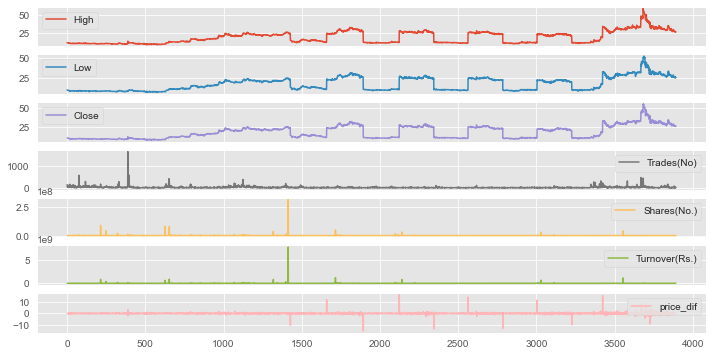

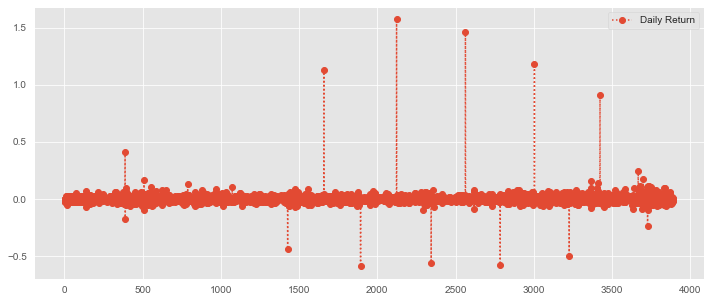

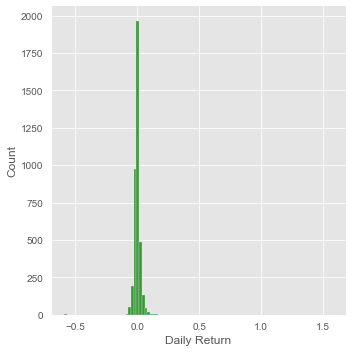

C:\Users\Chandu\AppData\Local\Temp\ipykernel_11568\3181249562.py:30: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


             Day   High    Low  Close  Trades(No)  Shares(No.)  Turnover(Rs.)  \
0     2010-01-04  10.50  10.00  10.00         138       381800        3868325   
1     2010-01-05  10.25  10.00  10.00          85       620900        6227125   
2     2010-01-06  10.00   9.75  10.00          36        57100         570500   
3     2010-01-07  10.00   9.75  10.00          26        26100         255450   
4     2010-01-08  10.00   9.75   9.75         107       291200        2853600   
...          ...    ...    ...    ...         ...          ...            ...   
3887  2022-12-23  26.00  25.70  26.00          18         4309         112030   
3888  2022-12-27  26.50  25.50  26.00          21         5829         151505   
3889  2022-12-28  26.00  26.00  26.00           1            1             26   
3890  2022-12-29  26.00  25.50  25.60          21         3380          86610   
3891  2022-12-30  26.00  25.70  25.70          13         1220          31691   

      price_dif  MA for 10 

Day                0
High               0
Low                0
Close              0
Trades(No)         0
Shares(No.)        0
Turnover(Rs.)      0
price_dif          0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

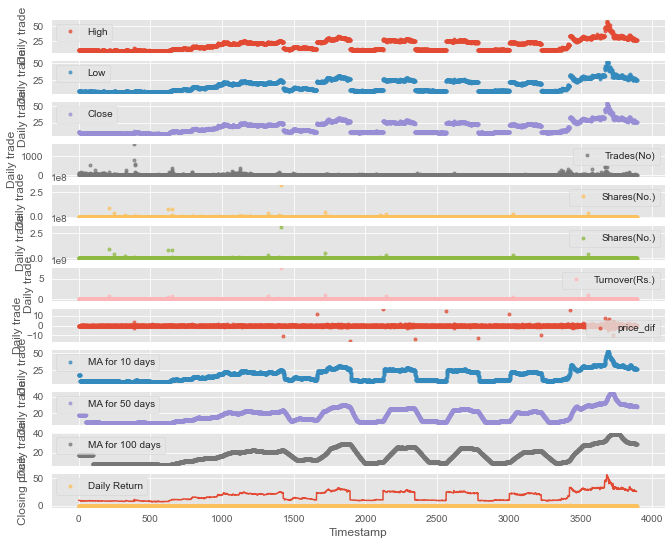

In [13]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Day'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['High', 'Low','Close','Trades(No)','Shares(No.)','Shares(No.)','Turnover(Rs.)','price_dif','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()


In [14]:
# visualizing data 

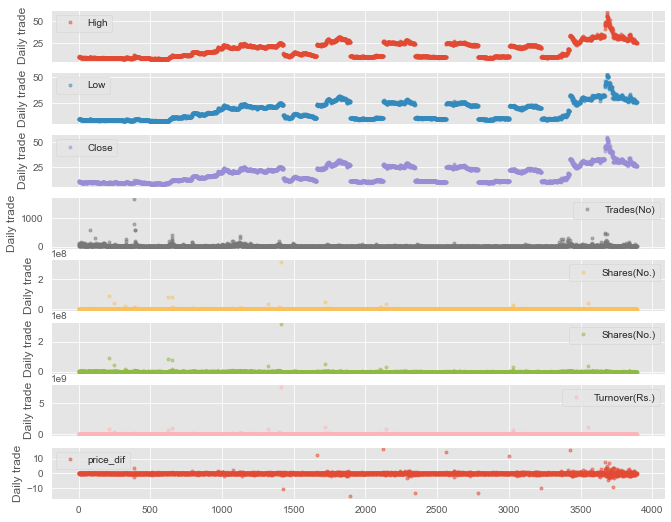

In [15]:
cols_plot = ['High', 'Low','Close','Trades(No)','Shares(No.)','Shares(No.)','Turnover(Rs.)','price_dif']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

             Day   High    Low  Close  Trades(No)  Shares(No.)  Turnover(Rs.)  \
0     2010-01-04  10.50  10.00  10.00         138       381800        3868325   
1     2010-01-05  10.25  10.00  10.00          85       620900        6227125   
2     2010-01-06  10.00   9.75  10.00          36        57100         570500   
3     2010-01-07  10.00   9.75  10.00          26        26100         255450   
4     2010-01-08  10.00   9.75   9.75         107       291200        2853600   
...          ...    ...    ...    ...         ...          ...            ...   
3887  2022-12-23  26.00  25.70  26.00          18         4309         112030   
3888  2022-12-27  26.50  25.50  26.00          21         5829         151505   
3889  2022-12-28  26.00  26.00  26.00           1            1             26   
3890  2022-12-29  26.00  25.50  25.60          21         3380          86610   
3891  2022-12-30  26.00  25.70  25.70          13         1220          31691   

      price_dif  MA for 10 

,count,mean,std,min,25%,50%,75%,max
High,3892.0,1.786233e+01,8.645768e+00,7.400000,10.100000,15.2000,2.450000e+01,6.000000e+01
Low,3892.0,1.740313e+01,8.289969e+00,7.000000,9.900000,14.9000,2.410000e+01,5.250000e+01
Close,3892.0,1.760748e+01,8.458230e+00,7.200000,10.000000,15.0000,2.430000e+01,5.570000e+01
Trades(No),3892.0,2.132477e+01,4.530773e+01,1.000000,5.000000,11.0000,2.300000e+01,1.641000e+03
Shares(No.),3892.0,3.575927e+05,5.828566e+06,1.000000,2371.250000,13142.5000,6.559100e+04,3.171972e+08
Turnover(Rs.),3892.0,6.504682e+06,1.289982e+08,9.000000,37879.500000,207730.0000,1.028639e+06,7.612791e+09
price_dif,3892.0,4.034952e-03,8.672067e-01,-15.600000,-0.100000,0.0000,1.000000e-01,1.650000e+01
MA for 10 days,3892.0,1.760674e+01,8.381806e+00,7.480000,10.020000,15.4050,2.436000e+01,5.306000e+01
MA for 50 days,3892.0,1.759986e+01,8.052860e+00,7.702000,10.061000,15.8330,2.322900e+01,4.568200e+01
MA for 100 days,3892.0,1.758029e+01,7.624863e+00,7.741000,10.287500,16.8445,2.221175e+01,3.959500e+01


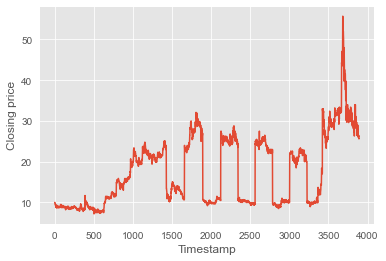

In [16]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [17]:
from sklearn.model_selection import train_test_split



X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=ts, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))


2653
1137


In [18]:
# Training part

In [19]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
67/67 [==============================] - 18s 74ms/step - loss: 0.0912 - mse: 0.0912 - mae: 0.1664 - val_loss: 0.0397 - val_mse: 0.0397 - val_mae: 0.1012
Epoch 2/40
67/67 [==============================] - 2s 35ms/step - loss: 0.0375 - mse: 0.0375 - mae: 0.0992 - val_loss: 0.0289 - val_mse: 0.0289 - val_mae: 0.0804
Epoch 3/40
67/67 [==============================] - 2s 37ms/step - loss: 0.0306 - mse: 0.0306 - mae: 0.0875 - val_loss: 0.0254 - val_mse: 0.0254 - val_mae: 0.0691
Epoch 4/40
67/67 [==============================] - 4s 56ms/step - loss: 0.0299 - mse: 0.0299 - mae: 0.0860 - val_loss: 0.0243 - val_mse: 0.0243 - val_mae: 0.0682
Epoch 5/40
67/67 [==============================] - 2s 35ms/step - loss: 0.0290 - mse: 0.0290 - mae: 0.0852 - val_loss: 0.0347 - val_mse: 0.0347 - val_mae: 0.0898
Epoch 6/40
67/67 [==============================] - 2s 34ms/step - loss: 0.0315 - mse: 0.0315 - mae: 0.0909 - val_loss: 0.0253 - val_mse: 0.0253 - val_mae: 0.0701
Epoch 7/40
67/67 [===

In [20]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 1, 98, 64)         256       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 1, 49, 64)         0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 1, 47, 128)        24704     
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, 1, 23, 128)        0         
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, 1, 21, 64)         2

In [21]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [22]:
#pip install graphviz

In [23]:
model.evaluate(test_X, test_Y)

36/36 [==============================] - 0s 10ms/step - loss: 0.0189 - mse: 0.0189 - mae: 0.0712


[0.018888987600803375, 0.018888987600803375, 0.07116533815860748]

In [24]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.926953
R2 Score: 0.926953
Max Error: 1.340582


36/36 [==============================] - 0s 7ms/step


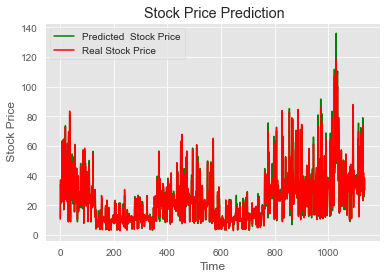

In [25]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [26]:
# Calculate evaluation metrics

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score, explained_variance_score, mean_absolute_error


mape = mean_absolute_percentage_error(test_Y.reshape(-1,1), yhat_probs)
mse = mean_squared_error(test_Y.reshape(-1,1), yhat_probs)
rmse = mean_squared_error(test_Y.reshape(-1,1), yhat_probs, squared=False)
mae = mean_absolute_error(test_Y.reshape(-1,1), yhat_probs)
r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
explained_var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)



# Print the evaluation metrics and directional accuracy
print("MAPE:", mape)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("Mean absolute error:", mae)
print("R-squared:", r2)
print("Explained variance:", explained_var)

MAPE: 1.0045291449065137
Mean squared error: 809.4695887983974
Root mean squared error: 28.451179040566974
Mean absolute error: 23.68786405776187
R-squared: -2.130200999696286
Explained variance: 0.03961792439690981


In [27]:
print(ts,'  ' , mse,'  ' ,r2,'  ' , mape)

0.3    809.4695887983974    -2.130200999696286    1.0045291449065137


In [28]:
# test = 0.2 --> mse = 20650.568364743605/ mape =  1.0002003103701038  / R2 = 0.939500 

# test = 0.1 --> mse = / mape =   / R2 =  

# test = 0.3 --> mse =  / mape =   / R2 =

# test = 0.25 --> mse = 0.001826660701137693 / mape = 410742158589.95654  / R2 = 0.938774

# test = 0.15 --> mse = / mape =   / R2 =  